#**Simulation and Modeling of Discrete Systems**

```
INF301 – System Modeling and Simulation
Prof. Luiz Henrique Bonani
Week 04
```

# Sampled Systems

Models of natural physical systems generally assume time as a deterministic continuous variable.

On the other hand, systems proposed by engineering often deal with discrete noise signals, events, and measurements, causing them to “see” time differently. This behavior leads to models that have associated random errors, in addition to artificial time bases.

# Integration Step

By convention, the variable $t$ represents real physical (chronological) time, and the variable $k$ represents discretized time.

Since continuous time cannot exist in a simulation, since computers are naturally discrete, simulation times are characterized by a constant $h$, which is referred to as the integration step size.

Unless an adaptive algorithm controls $h$, its relation to chronological time is:

$$t=hk+t_0$$

# Sampling

A computer system being used to model an analog device must sample the system variables and then create other discrete-time variables.

Assuming that sampling occurs every $δ$ time units, the fundamental relationship for modeling a sampled signal is:

$$t = δk + t_0$$

Although the above equations are very similar, they have subtle differences in meaning and interpretation.

## Sampling and De-sampling

Usually, the integration step size h and the sampling interval $δ$ are not the same thing; it is common to use the expression sampling frequency $f$ instead of the sampling interval, and they are related as $f = 1/δ$.

The inverse of a sampled signal is a continuous signal that puts all the sampled times together.

This process, called de-sampling (or reconstruction), would ideally result in the original signal; however, due to the loss of information during sample quantization, the reconstruction is only an approximation of the original signal.

## Zero-Order Holder

The process of holding the value of $x(k)$ until the following sample creates a new (discontinuous) signal $x^*(t)$ defined for continuous time.

This signal is known as the zero-order holder product, as it remains constant (zero-order polynomial) until the next sample of the signal is taken.

Since the simulation is implemented digitally, the reconstruction process is also discrete.

In general, desampling is done at a rate $f_2 = 1/δ_2$, which is less frequent than the sampling rate and $f_1 ≥ f_2$.

## Desampler

The fact that there are differences between the rates presents three specific cases of interest:

The sampling and desampling frequencies are the same: $f_1 = f_2$, which is equivalent to $δ_1 = δ_2$.

The sampling frequency is an integer multiple of the desampling frequency $f_1 = nf_2$, or equivalently, $δ2 = n δ1$.

The sampling frequency is smaller than the desampling frequency, but is not a multiple of it, so $δ_2 > δ_1$.

## Signals Created by a Sampler with Zero Order Holder

<center>

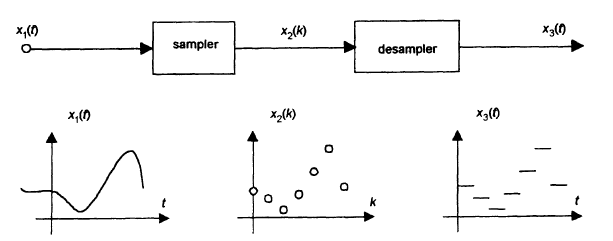
</center>

## Example 1

Consider the sinusoidal signal $x(t) = \sin(t)$ in the interval $[0,10]$ with a sampling frequency of 4 samples per second.

Show the results of sampling the continuous signal and then reverse the sampling process using a de-sampling frequency of 2 samples per second.

**Solution**:

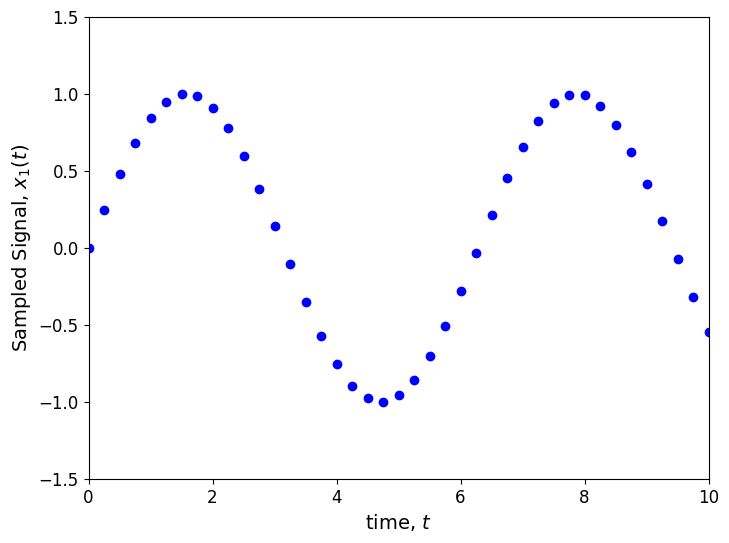

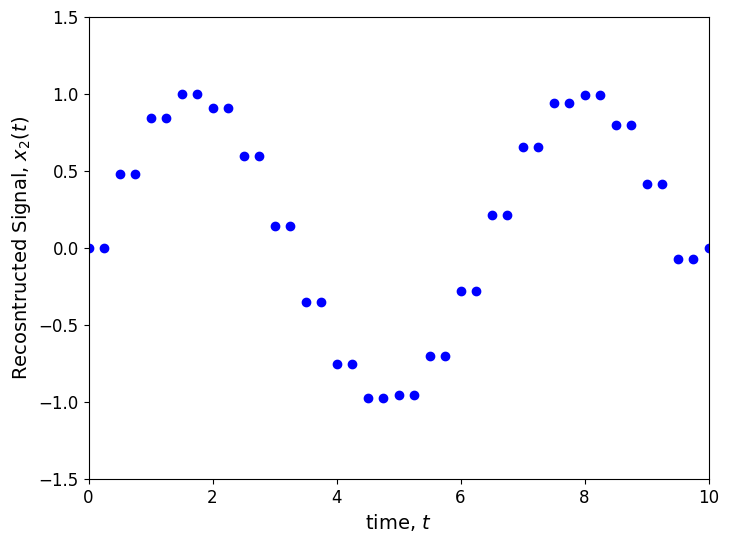

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 10; f1 = 4; f2 = 2
m = T*f1; n = T*f2

x1 = np.zeros(m+1); t1 = np.zeros(m+1)
for k in range(1,m+1):
  t1[k] = t1[k-1] + 1/f1;
  x1[k] = np.sin(t1[k]);

x2 = np.zeros(m+1);
for k in range(0,m-1,int(f1/f2)):
  x2[k] = x1[k];
  kk = k
  for j in range(1,int(f1/f2)):
    kk = kk + 1
    x2[kk] = x2[kk-1]

# Figures
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t1, x1,"bo",label = "Sampled Function")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"Sampled Signal, $x_1(t)$",fontsize=14)
plt.axis([0, 10, -1.5, 1.5])
plt.show()

fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t1, x2,"bo",label = "Sampled function")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"Recosntructed Signal, $x_2(t)$",fontsize=14)
plt.axis([0, 10, -1.5, 1.5])
plt.show()

Try other values for the sampling and de-sampling frequencies!

# Extrapolation

In general, the desampling process is an extrapolation process that predicts the future given some previous points have been provided.

This behavior is quite different from the process in which a certain value can be predicted given that there are known points at the endpoints of the unknown point.

The extrapolation process can be extended to higher order polynomials.

In general, if there are $s + 1$ previous samples, one can determine a polynomial of order $s$ to fit these samples.

## Constituent Polynomials

Assuming that the value of the signal in the present and its previous values $s$ are given, one can define the constituent polynomial $L_k(t)$.

$$
\begin{gathered}
L_{k}(t)=x_{k} \frac{\left(t-t_{k-1}\right)\left(t-t_{k-2}\right) \cdots\left(t-t_{k-s}\right)}{\left(t_{k}-t_{k-1}\right)\left(t_{k}-t_{k-2}\right) \cdots\left(t_{k}-t_{k-s}\right)} \\
L_{k-1}(t)=x_{k-1} \frac{\left(t-t_{k}\right)\left(t-t_{k-2}\right) \cdots\left(t-t_{k-s}\right)}{\left(t_{k-1}-t_{k}\right)\left(t_{k-1}-t_{k-2}\right) \cdots\left(t_{k-1}-t_{k-s}\right)}
\end{gathered}
$$


In general, the total set of constituent polynomials is defined by:

$$
L_{i}(t)=x_{i} \prod_{j=0, j \neq i}^{s} \frac{t-t_{j}}{t_{i}-t_{j}}
$$

## Lagrangian Extrapolation Polynomial

This set of polynomials has the useful property that at each sampled point $t_k$,

$$
L_{i}\left(t_{k}\right)=\left\{\begin{array}{l}
0, \quad i \neq k \\
x_{k}, i=k
\end{array}\right.
$$

Since each constituent polynomial contributes exactly one point $(t_k, x_k)$ in the data set, the sum of all $Li(t)$ forms the Lagrangian extrapolation polynomial. Like this:


$$
\hat{x}(t)=\sum_{i=0}^{s}\left(x_{i} \prod_{j=0, j \neq i}^{s} \frac{t_{k}-t_{j}}{t_{i}-t_{j}}\right)
$$

## Example 2

Suppose a data set is sampled at a rate of 2 samples per second. Calculate the third-order interpolation polynomial at $t_k$ = 6.5 min for the data in the table and predict the value at 6 min 50 sec (6.83 min).

<div align="center">

|   k   |   t<sub>k</sub>  |   x<sub>k</sub>  |
|:-----:|:-----:|:-----:|
| . | .  | .  |
| . | .  | .  |
| . | .  | .  |
|   5   |  4.0  |   2   |
|   6   |  4.5  |   3   |
|   7   |  5.0  |   1   |
|   8   |  5.5  |   0   |
|   9   |  6.0  |   2   |
|   10  |  6.5  |   2   |
</div>



**Solution**:

From the first two columns, $t_k = 0.5k + 1.5$, which equates to a sampling interval $(δ)$ of 0.5 min = 30 seconds and a $t_0 = 1.5$ min.

Since this is a third-order polynomial in $k$ = 10, only the most recent $s + 1$ = 4 samples ($k$ = 7, 8, 9, 10) are needed.


$$ L_i(t) = x_i \prod_{j=0,j\neq i}^s\frac{t-t_j}{t_i-t_j} $$

and

$$ \hat{x}(t) = \sum_{i=0}^s L_i(t) $$

Calculating each polynomial,

$$
\begin{gathered}
L_{10}(t)=2 \frac{(t-6.0)(t-5.5)(t-5.0)}{(6.5-6.0)(6.5-5.5)(6.5-5.0)}=\frac{8}{3}(t-6)(t-5.5)(t-5)=8 / 3^{3}-44 t^{2}+724 / 3 t-440 \\
L_{9}(t)=2 \frac{(t-6.5)(t-5.5)(t-5.0)}{(6.0-6.5)(6.0-5.5)(6.0-5.0)}=-8(t-6.5)(t-5.5)(t-5)=-8 t^{3}+136 t^{2}-766 t+1430 \\
L_{7}(t)=1 \frac{(t-6.5)(t-6.0)(t-5.5)}{(5.0-6.5)(5.0-6.0)(5.0-5.5)}=-\frac{4}{3}(t-6.5)(t-6)(t-5.5)=-4 / 3 t^{3}+24 t^{2}-431 / 3 t+286
\end{gathered}
$$

Paying attention to the fact that $L_8(t) = 0$ ($x_8 = 0$), we arrive at

$$
\hat{x}(t)=-20 / 3 t^{3}+116 t^{2}-2005 / 3 t+1276
$$

Substituting the values ​​for checking,

$$
\begin{gathered}
\hat{x}(5.0)=1, \hat{x}(5.5) \approx 0, \hat{x}(6.0)=2, \hat{x}(6.5)=2\end{gathered}
$$

Thus,

$$
\hat{x}(6.83) \approx-1.524
$$

# Lagrange's Formula

Lagrange's formula is quite general, and there is no restriction on the points being equally spaced.

However, the sampling occurs at fixed and regular time intervals, $δ = t_k – t_{k-1} = 1/f$. Thus, this case simplifies Lagrange's formula.

$$
\begin{aligned}
L_{k}(t) &=x_{k} \frac{\left(t-t_{k}\right)\left(t-t_{k-2}\right) \cdots\left(t-t_{k-s}\right)}{\left(t_{k}-t_{k-1}\right)\left(t_{k}-t_{k-1}\right) \cdots\left(t_{k}-t_{k-s}\right)}=x_{k} \frac{\left(t-t_{k}\right)\left(t-t_{k-2}\right) \cdots\left(t-t_{k-s}\right)}{(\delta)(2 \delta) \cdots(s \delta)} \\
&=\frac{1}{s !} f^{s} x_{k}\left(t-t_{k-1}\right)\left(t-t_{k-2}\right) \cdots\left(t-t_{k-s}\right)
\end{aligned}
$$

For all constituent polynomials, one can arrive at:

$$
\begin{aligned}
L_{k-i}(t) &=\frac{(-1)^{i}}{i !(s-i) !} f^{s}\left(t-t_{k}\right)\left(t-t_{k-1}\right) \cdots\left(t-t_{k-i+1}\right) x_{k-i}\left(t-t_{k-i-1}\right) \cdots\left(t-t_{k-s}\right) \\
&=\frac{(-1)^{i}}{i !(s-i) !} f^{s} x_{k-i} \prod_{j=0, j \neq i}^{s}\left(t-t_{k-j}\right)
\end{aligned}
$$

Thus, the Lagrange extrapolation for the sampled signals can be given by:

$$
\hat{x}(t)=f^{s} \sum_{i=0}^{s} \frac{(-1)^{i}}{i !(s-i) !}\left[x_{k-i} \prod_{j=0, j \neq i}^{s}\left(t-t_{k-j}\right)\right]
$$

The Lagrange extrapolation algorithm can be implemented computationally using built-in Numpy functions.



## Lagrange function

For example, given that a polynomial can be determined using Python by a vector of coefficients, the Numpy functions *multiply()*, *tile()*, and *convolve()* solve the problem (See how these functions work!).

Example: Extrapolating Lagrange polynomial of degree two (quadratic) to approximate $f(x) = 1 + 2/x$ at the points $x_0 = 1$, $x_1 = 2$, and $x_3 = 2.5$.

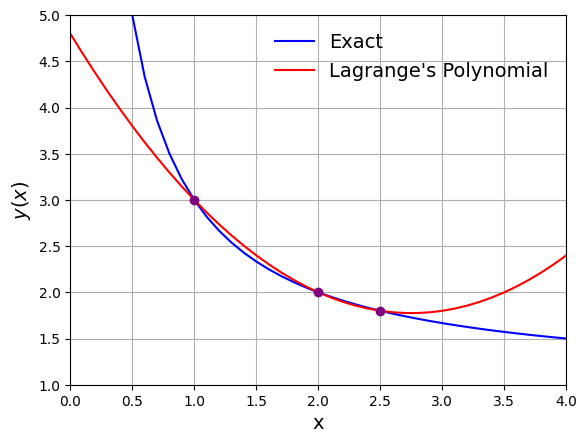

In [ ]:
import numpy as np
np.seterr(divide="ignore")
import matplotlib.pyplot as plt

def lagrange(X,Y,n):
# Input: -X is the vector with the abscissas of the points
#        -Y is the vector with the ordinates of the points
#        -n is the order of the interpolation polynomial
# Output: -C is the matrix with the coefficients of the Lagrange interpolation polynomial
#         -L is the matrix with the constituent Lagrange polynomials
  P = np.zeros((n+1,n+1))
  for k in range(n+1):
    V = 1
    for j in range(n+1):
      if (k != j):
         V = np.convolve(V, np.poly([X[j]]),'full')/(X[k]-X[j])
    P[k,:] = V
  L = np.array(np.multiply(np.tile(np.matrix(Y[0:n+1]).T, (1,n+1)),P))
  C = np.array(np.sum(L, axis=0))
  return C, L

# Getting the Lagrange coefficients
X = np.array([1, 2, 2.5])
Y = 1 + 2/X
C, L = lagrange(X,Y,2)

# Exact Function
x = np.array(np.arange(0,4.1,0.1))
y = 1 + 2/x

# Lagrange's polynomial
yp = np.polyval(C,x)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(x, y,"b-",label = "Exact")
plt.plot(x, yp,"r-",label = "Lagrange's Polynomial")
plt.plot(X,Y,"o",color="purple")
plt.xlabel("x",fontsize=14)
plt.ylabel(r"$y(x)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 4, 1, 5])
plt.grid()
plt.show()

In [ ]:
print("C=",C)
print("L=",L)

C= [ 0.4 -2.2  4.8]
L= [[  2.   -9.   10. ]
 [ -4.   14.  -10. ]
 [  2.4  -7.2   4.8]]


## Example 3

Using the Lagrange function, show a zeroth and 2nd order approximation for $x(t) = \sin(t)$ with original sampling frequency 1 and interpolation frequency 4 in the interval $[0,20]$.

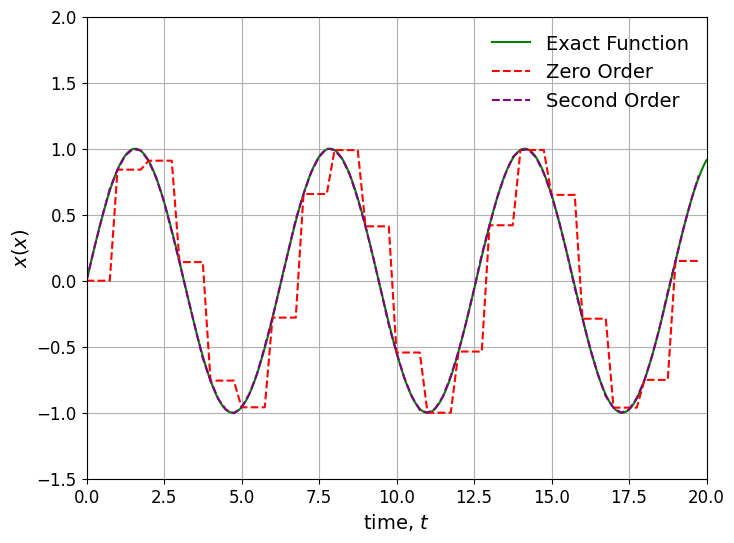

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(X,Y,n):
# Input: -X is the vector with the abscissas of the points
#        -Y is the vector with the ordinates of the points
#        -n is the order of the interpolation polynomial
# Output: -C is the matrix with the coefficients of the Lagrange interpolation polynomial
#         -L is the matrix with the constituent Lagrange polynomials
  P = np.zeros((n+1,n+1))
  for k in range(n+1):
    V = 1
    for j in range(n+1):
      if (k != j):
         V = np.convolve(V, np.poly([X[j]]),'full')/(X[k]-X[j])
    P[k,:] = V
  L = np.array(np.multiply(np.tile(np.matrix(Y[0:n+1]).T, (1,n+1)),P))
  C = np.array(np.sum(L, axis=0))
  return C, L

m = 20;
t = np.arange(0,20.001,0.001) # continous time
x = np.sin(t) # continous signal
f1 = 1; delta1 = 1/f1; f2 = 4; delta2 = 1/f2;

t1 = np.arange(0,20+delta1,delta1); t2 = np.arange(0,20+delta2,delta2)
R0 = 0; R2 = 0; T2 = 0

R0 = []; R2 = []; T2 = []
for i in range(1,len(t1)):
  tt = [];
  for j in range(len(t2)):
    if ((t2[j] < t1[i]) and (t2[j] >= t1[i-1])):
       tt.append(t2[j]);

  xx = np.array(np.sin(tt));
  c0,l0 = lagrange(tt,xx,0)
  r0 = np.polyval(c0,tt)
  c2,l2 = lagrange(tt,xx,2)
  r2 = np.polyval(c2,tt);

  R0 = np.concatenate((R0, r0),axis=None)
  R2 = np.concatenate((R2, r2),axis=None)
  T2 = np.concatenate((T2, tt),axis=None)

# Figure
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, x,"g-",label = "Exact Function")
plt.plot(T2,R0,"r--",label = "Zero Order")
plt.plot(T2,R2,"--",color="purple",label = "Second Order")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"$x(x)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 20, -1.5, 2])
plt.grid()
plt.show()

# Spatial Systems

Physical systems are a source of a large number of rich models. For example, in mechanical systems, if $x(t)$ is the position of a mass at time t, $\dot{x}(t) = dx/dt$ is the velocity, and $\ddot{x}(t) = d^2x/dt^2$ is the acceleration of a mass at time $t$.

Assuming a constant mass attached to a spring in a viscous medium, as shown in the figure, the forces are:

<center>

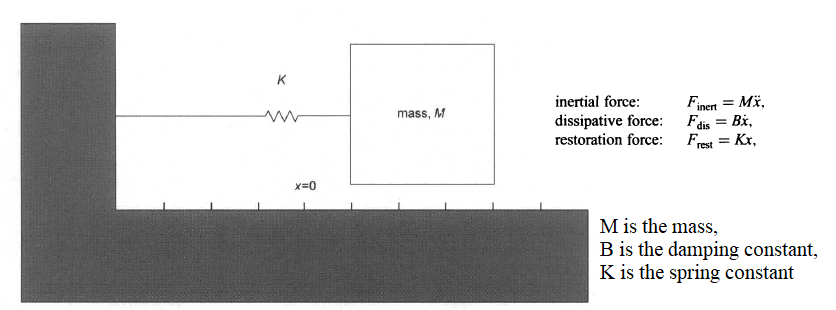
</center>

According to the fundamental laws of Newtonian mechanics, the vector sum of all forces must be equal to the external force applied to the system, that is:

$$M\ddot{x}+B\dot{x}+Kx = f(t)$$

By defining position and velocity as state variables and knowing their respective initial conditions, a first-order differential equation can be established in which all the techniques seen previously can be employed.

$$
\begin{aligned}
&\dot{x}=v, \\
&\dot{v}=-\frac{K}{M} x-\frac{B}{M} v+\frac{1}{M} f(t) \\
&x\left(t_{0}\right)=x_{0}, \quad v\left(t_{0}\right)=v_{0}
\end{aligned}
$$

## Example 4

Consider a mechanical system described by the differential equation below, where $w(t)$ is a random shock noise with a Gaussian distribution, zero mean, and standard deviation 2. Initially, the mass is at rest and positioned at $x = 0.5$. Simulate the motion of this system in the interval $[0,50]$ using an integration frequency of 50 integrations per second, with a display rate of 10 per second and 1 shock per second.

$$
\ddot{x}+2 \dot{x}+x=1 / 2 \sin(t)+w(t)
$$

**Solution**:

Using position and velocity as state variables, the problem can be rewritten as:

$$
\begin{aligned}
&\dot{x}=v, \\
&\dot{v}=-x-2 v+1 / 2 \sin(t)+w(t), \quad x(0)=0.5, \quad v(0)=0
\end{aligned}
$$

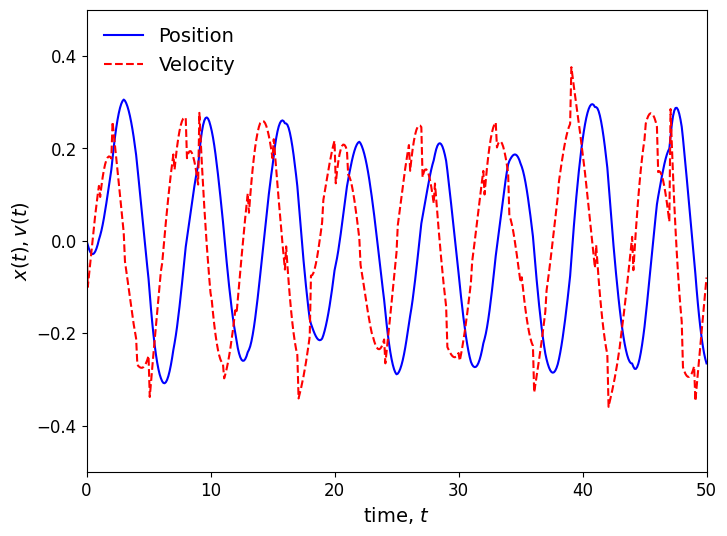

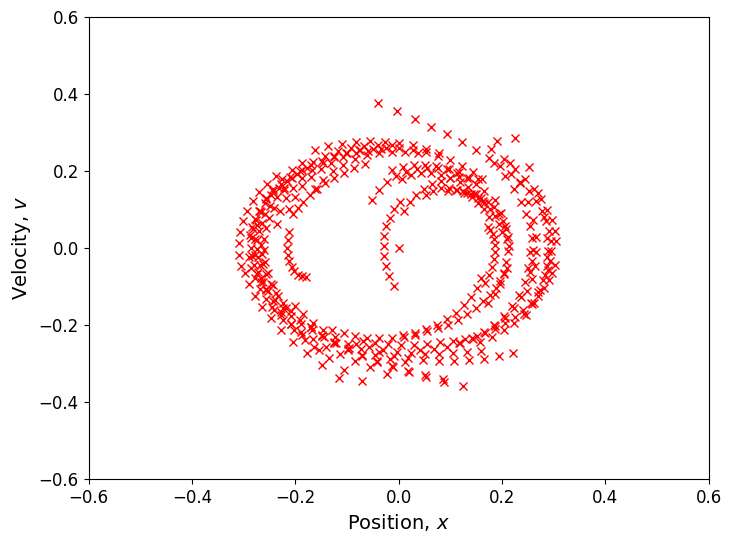

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.02; t = 0; x = 0.5; v = 0;

N = 50; M = 10; P = 5
x = np.zeros(N*M*P+1); v = np.zeros(N*M*P+1); t = np.zeros(N*M*P+1)

id = 0;
for i in range(N):
    r1 = np.random.random_sample()
    r2 = np.random.random_sample()
    w = 5 * np.sqrt(-2 * np.log(r1)) * np.cos(2 * np.pi * r1)
    for j in range (M):
        for k in range (P):
            x[id+1] = x[id] + h * v[id]
            v[id+1] = v[id] + h * (-2 * v[id] - x[id] + 0.5 * np.sin(t[id]) + w)
            t[id+1] = t[id] + h
            id += 1
            w = 0

t = t[::5] #downsample of t by 5
x = x[::5] #downsample of x by 5
v = v[::5] #downsample of v by 5

# Figuras
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, x,"b-",label = "Position")
plt.plot(t, v,"r--",label = "Velocity")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel(r"$x(t), v(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.axis([0, 50, -0.5, 0.5])
plt.show()


fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(x, v,"rx",label = "Position")
plt.xlabel("Position, $x$",fontsize=14)
plt.ylabel("Velocity, $v$",fontsize=14)
plt.axis([-0.6, 0.6, -0.6, 0.6])
plt.show()

# Finite Differences

There are problems, known as boundary value problems, that cannot be solved using the methods seen so far, as these methods consider only one initial condition.

There are cases in which the evolution of the system depends on the initial conditions in a given region of space, and these conditions have a mutual influence on the system's behavior, which cannot always be achieved.

This scenario renders the methods seen so far inappropriate, as they are based on knowing all the initial conditions simultaneously.

In addition, it is not always possible to obtain an analytical solution for these problems; therefore, a finite difference resolution strategy is used.

## Finite Difference Formula

For well-behaved functions $x(t)$, Taylor's formula says
that:

$$
x(t+h)=\sum_{k=0}^{\infty} \frac{h^{k}}{k !} x^{(k)}(t)=x(t)+h \dot{x}(t)+1 / 2 h^{2} \ddot{x}(t)+1 / 6 h^{3} \ddot{x}(t)+\cdots
$$

Replacing $h$ with $–h$ in the above equation, we have:

$$
x(t-h)=x(t)-h \dot{x}(t)+1 / 2 h^{2} \ddot{x}(t)-1 / 6 h^{3} \dddot x(t)+\cdots
$$

Thus, for small values ​​of $h$ and ignoring higher-order terms, we can write, subtracting the two previous equations and solving for $\dot{x}(t)$:

$$
\dot{x}(t) \approx \frac{x(t+h)-x(t-h)}{2 h}
$$

Now adding the equations and solving for $\ddot{x}(t)$:

$$
\ddot{x}(t) \approx \frac{x(t+h)-2x(t)+x(t-h)}{h^2}
$$

These last two equations are known as the central difference equations for the first and second derivatives, respectively.

In practice, these equations are converted to discrete time, which makes the approximations for the first derivative:

$$
\dot{x}(t) = \frac{x(k+1)-x(k-1)}{2 h}
$$

And for the second derivative:

$$
\ddot{x}(t) \approx \frac{x(k+1)-2x(k)+x(k-1)}{h^2}
$$



## Example 5

Considering the following boundary value problem, find an approximate solution for $x(t)$ in the interval $[1, 3]$.

$$
\begin{aligned}
&t^{2} \ddot{x}-2 t \dot{x}+2 x+4=0 \\
&x(1)=0, \quad x(3)=0
\end{aligned}
$$

**Solution**:

By applying classical methods to solve differential equations, it is shown that the analytical solution for this system is:

$$
x(t)=2 / 3(t-1)(3-t)
$$

Using $t_0 = 1$ and $t_n = 3$, and the finite difference equations shown above, if there are n intervals in $[1, 3]$, $h = 2/n$ and $t = 2k/n + 1$.

$$
\left(1+\frac{2 k}{n}\right)^{2} \frac{x(k+1)-2 x(k)+x(k-1)}{(2 / n)^{2}}-2\left(1+\frac{2 k}{n}\right) \frac{x(k+1)-x(k-1)}{2(2 / n)}+2 x(k)+4=0
$$

Simplifying the equation:

$$
\begin{gathered}
\begin{array}{c}
(n+2 k)(n+2 k-2) x(k+1)-2(n+2 k+2)(n+2 k-2) x(k) \\
+(n+2 k)(n+2 k+2) x(k-1)+16=0
\end{array} \end{gathered}
$$
and
$$
x(k)=\frac{(n+2 k)(n+2 k-2) x(k+1)+(n+2 k)(n+2 k+2) x(k-1)+16}{2(n+2 k+2)(n+2 k-2)}
$$

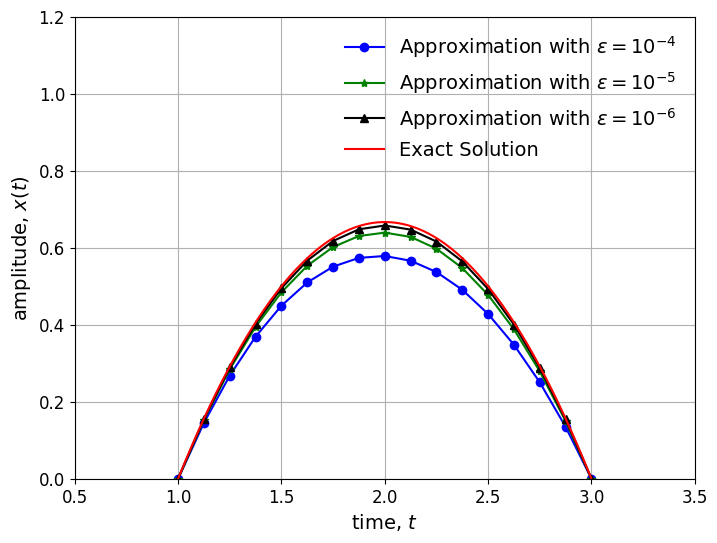

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 16; tp = np.arange(1,30.1,0.01)
xe = 2/3*(tp - 1)*(3 - tp);
X = np.zeros((3,n+1)); e = np.zeros(3)

for i in range(3):
    e[i] = 4 + i
    eps = 10**(-e[i])
    diff = 10

    x = np.zeros(n+1); t = np.arange(1,3+2/n,2/n)
    t[n] = 3

    xp = np.zeros(n+1);
    while (diff > eps):
        for j in range(n-1):
            k = j + 1 # j = k - 1
            xp[k] = x[k]
            x[k] = ((n+2*k)*(n+2*k-2)*x[k+1]+(n+2*k)*(n+2*k+2)*x[k-1]+16)/(2*(n+2*k+2)*(n+2*k-2))
        diff = 0
        for k in range(1,n):
            diff = diff + (x[k] - xp[k])**2
    X[i,:] = x


# Figuras
fig = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = "12"
plt.plot(t, X[0,:],"bo-",label = "Approximation with $\epsilon = 10^{-%d}$"%e[0])
plt.plot(t, X[1,:],"g*-",label = "Approximation with $\epsilon = 10^{-%d}$"%e[1])
plt.plot(t, X[2,:],"k^-",label = "Approximation with $\epsilon = 10^{-%d}$"%e[2])
plt.plot(tp, xe,"r-",label = "Exact Solution")
plt.xlabel("time, $t$",fontsize=14)
plt.ylabel("amplitude, $x(t)$",fontsize=14)
plt.legend(prop={"size":14},frameon=False)
plt.grid()
plt.axis([0.5, 3.5, 0, 1.2])
plt.show()

# Partial Differential Equations

Finite difference equations can be easily extended to multiple dimensions, which allows the calculation of partial derivatives in functions with more than one dependent variable.

Partial derivatives are calculated by differentiating one variable while keeping the other fixed. Like this:

$$
\begin{aligned}
&\frac{\partial}{\partial x} \phi(x, y) \approx \frac{\phi(x+h, y)-\phi(x-h, y)}{2 h} \\
&\frac{\partial}{\partial y} \phi(x, y) \approx \frac{\phi(x, y+h)-\phi(x, y-h)}{2 h}
\end{aligned}
$$

Likewise, the second-order derivatives:

$$
\begin{aligned}
&\frac{\partial^{2}}{\partial x^{2}} \phi(x, y) \approx \frac{\phi(x+h, y)-2 \phi(x, y)+\phi(x-h, y)}{h^{2}} \\
&\frac{\partial^{2}}{\partial y^{2}} \phi(x, y) \approx \frac{\phi(x, y+h)-2 \phi(x, y)+\phi(x, y-h)}{h^{2}}
\end{aligned}
$$

# Exercise

1 Consider a continuous signal $x(t)$, which can take three forms:

i. $x(t) = 2 sin(7t) + 5 cos(12t)$

ii. $x(t) = 2 sin(7t) + 5 cos(12t) + w(t)$, where $w(t)$ is an additive Gaussian white noise with variance 2.

iii. $x(t) = x(t-1) + 2 sin(7t) + 5 cos(12t) + w(t)$, where $w(t)$ is an additive Gaussian white noise with variance 1.


These signals are sampled with $f_s$ samples per second. Assuming a granularity of $h$ seconds:

(a) Write a program to sample and interpolate using the Lagrange polynomial, obtaining $x'(t)$ ;

(b) Compare $x(t)$ with $x’(t)$, as a function of the sum of the differences found for each point, using the degrees of the polynomial from 0 to 2.

(c) According to part (b), think about how one could optimize the order of the polynomial

# References

1. SEVERANCE, F. L., System Modeling and Simulation, John Wiley & Sons, 2001. (Some figures shown in this class were taken from this reference.)